Bo Yang (Aaron) USCID:7526922531

### INF 552 HOMEWORK_4  Date: 10-22-2019

## 1.The LASSO and Boosting for Regression 

### (a) Download the Communities and Crime data1 from https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime. Use the first 1495 rows of data as the training set and the rest as the test set.

In [1]:
ROOT_PATH = ".\\assets"
CRIME = "\\communities.csv"
APS_TRAIN = "\\aps_failure_training_set.csv"
APS_TEST = "\\aps_failure_test_set.csv"
SPLASH = "\\"

In [2]:
CRIME_FULL_COLUMNS = ["state","county","community","communityname string","fold","population","householdsize","racepctblack","racePctWhite","racePctAsian","racePctHisp","agePct12t21","agePct12t29","agePct16t24","agePct65up","numbUrban","pctUrban","medIncome","pctWWage","pctWFarmSelf","pctWInvInc","pctWSocSec","pctWPubAsst","pctWRetire","medFamInc","perCapInc","whitePerCap","blackPerCap","indianPerCap","AsianPerCap","OtherPerCap","HispPerCap","NumUnderPov","PctPopUnderPov","PctLess9thGrade","PctNotHSGrad","PctBSorMore","PctUnemployed","PctEmploy","PctEmplManu","PctEmplProfServ","PctOccupManu","PctOccupMgmtProf","MalePctDivorce","MalePctNevMarr","FemalePctDiv","TotalPctDiv","PersPerFam","PctFam2Par","PctKids2Par","PctYoungKids2Par","PctTeen2Par","PctWorkMomYoungKids","PctWorkMom","NumIlleg","PctIlleg","NumImmig","PctImmigRecent","PctImmigRec5","PctImmigRec8","PctImmigRec10","PctRecentImmig","PctRecImmig5","PctRecImmig8","PctRecImmig10","PctSpeakEnglOnly","PctNotSpeakEnglWell","PctLargHouseFam","PctLargHouseOccup","PersPerOccupHous","PersPerOwnOccHous","PersPerRentOccHous","PctPersOwnOccup","PctPersDenseHous","PctHousLess3BR","MedNumBR","HousVacant","PctHousOccup","PctHousOwnOcc","PctVacantBoarded","PctVacMore6Mos","MedYrHousBuilt","PctHousNoPhone","PctWOFullPlumb","OwnOccLowQuart","OwnOccMedVal","OwnOccHiQuart","RentLowQ","RentMedian","RentHighQ","MedRent","MedRentPctHousInc","MedOwnCostPctInc","MedOwnCostPctIncNoMtg","NumInShelters","NumStreet","PctForeignBorn","PctBornSameState","PctSameHouse85","PctSameCity85","PctSameState85","LemasSwornFT","LemasSwFTPerPop","LemasSwFTFieldOps","LemasSwFTFieldPerPop","LemasTotalReq","LemasTotReqPerPop","PolicReqPerOffic","PolicPerPop","RacialMatchCommPol","PctPolicWhite","PctPolicBlack","PctPolicHisp","PctPolicAsian","PctPolicMinor","OfficAssgnDrugUnits","NumKindsDrugsSeiz","PolicAveOTWorked","LandArea","PopDens","PctUsePubTrans","PolicCars","PolicOperBudg","LemasPctPolicOnPatr","LemasGangUnitDeploy","LemasPctOfficDrugUn","PolicBudgPerPop","ViolentCrimesPerPop"]

In [3]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

def genderate_column_indexes(dataFrame, y_column_index):
    x_column_index = list(range(0, dataFrame.shape[1]))
    if y_column_index == -1:
        x_column_index.remove(dataFrame.shape[1] - 1)
    else:
        x_column_index.remove(y_column_index)

    return x_column_index


def data_imputation(dataFrame, assignedColumnNames, y_column_name):
    # get the indexes if the column's content has nan
    imputeIndex = list()
    missingValueColumn = dataFrame.columns[dataFrame.isnull().any()]
    remainColumnNames = list(set(assignedColumnNames) - set(missingValueColumn.tolist()))
    remainColumnNames.remove(y_column_name)
    remainColumnNames.sort(key=assignedColumnNames.index)
    for index in missingValueColumn:
        # if there are more than 2/3 of data exist in that column, we can use mean strategy to impute data.
        # print(X_data[index].item())
        if dataFrame[index].count() > (2 * len(dataFrame) / 3):
            imputeIndex.append(index)
            remainColumnNames.append(index)

    imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
    for index in imputeIndex:
        originalValue = dataFrame[index].to_numpy().reshape(-1, 1)
        imp_mean.fit(originalValue)
        dataFrame[index] = imp_mean.transform(originalValue)

    return dataFrame, remainColumnNames


def load_data(filePath, skip_first_column=0, skip_first_row=0, y_column_index=-1, needImpute=False,
              assignedColumnNames=CRIME_FULL_COLUMNS, missingSymbol='?', dropOrNot=True, 
              get_first_rows=None):
    
    assert (filePath is not None) and (len(filePath) >= 1), "empty file path"
    
    dataFrame = pd.read_csv(filePath, encoding='utf-8', delimiter=",", 
                            header=None, skiprows=skip_first_row)
    
    dataFrame.columns = assignedColumnNames
    y_column_name = assignedColumnNames[y_column_index]

    # skip some columns
    dataFrame.drop(dataFrame.iloc[:, :skip_first_column], inplace=True, axis=1)
    assignedColumnNames = assignedColumnNames[skip_first_column:]

    x_column_index = genderate_column_indexes(dataFrame, y_column_index)

    # If need process data imputation
    if needImpute:

        X_data = dataFrame.iloc[:, x_column_index].replace(missingSymbol, np.nan)
        # get the indexes if the column's content has nan
        X_data, remainColumnNames = data_imputation(X_data, assignedColumnNames, y_column_name)

        # drop some column which contain missing value.
        if dropOrNot:
            X_data = X_data.dropna(axis=1)
            X_data.columns = remainColumnNames
        y_data = dataFrame.iloc[:, y_column_index]
    else:
        X_data = dataFrame.iloc[:, x_column_index]
        y_data = dataFrame.iloc[:, y_column_index]

    return X_data, y_data


def train_test_split_by_size(X_data, y_data, train_size, random_state=None):
    assert X_data.shape[0] == y_data.shape[0], \
        "the size of X must be equal to the size of y"
    if random_state:
        np.random.seed(random_state)

    shuffled_indexes = np.random.permutation(len(X_data))

    test_size = len(X_data) - train_size
    test_indexes = shuffled_indexes[:test_size]
    train_indexes = shuffled_indexes[test_size:]

    X_train = X_data.loc[train_indexes, :]
    y_train = y_data.loc[train_indexes]

    X_test = X_data.loc[test_indexes, :]
    y_test = y_data.loc[test_indexes]

    return X_train, X_test, y_train, y_test

In [5]:
X_data, y_data = load_data(ROOT_PATH + CRIME, y_column_index=-1)

print("X Row Data Shape: ", X_data.shape)
print("y Row Data Shape: ", y_data.shape)
X_train, X_test, y_train, y_test = train_test_split_by_size(X_data, y_data, 
                                                            train_size=1495, random_state=2333)

print("X_Train Data Shape: ", X_train.shape)
print("y_Train Data Shape: ", y_train.shape)
print("X_test Data Shape: ", X_test.shape)
print("y_test Data Shape: ", y_test.shape)

X Row Data Shape:  (1994, 127)
y Row Data Shape:  (1994,)
X_Train Data Shape:  (1495, 127)
y_Train Data Shape:  (1495,)
X_test Data Shape:  (499, 127)
y_test Data Shape:  (499,)


### (b) The data set has missing values. Use a data imputation technique to deal with the missing values in the data set. The data description mentions some features are nonpredictive. Ignore those features.

In [6]:
X_data, y_data = load_data(ROOT_PATH + CRIME, y_column_index=-1, skip_first_column=5)
print("X_data Row Data Shape: ", X_data.shape)
print("y Row Data Shape: ", y_data.shape)
X_data = X_data.replace('?', np.nan)
missingValueColumnIndex = X_data.columns[X_data.isnull().any()]

print("In the beginning, there are total {} columns has missing value in the dataset ".format(
    missingValueColumnIndex.shape[0]))
print("------------------------------------------------------------------------------")
print(X_data[missingValueColumnIndex].describe())

# so  we can only impute only one column (index=25)
index = 'OtherPerCap'
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(X_data[[index]])
X_data[[index]] = imp_mean.transform(X_data[[index]])
print("------------------------------------------------------------------------------")
missingValueColumnIndex = X_data.columns[X_data.isnull().any()]
# remain = list(set(REMAIN_COLUMNS) - set(missingValueColumnIndex))
# remain.sort(key=REMAIN_COLUMNS.index)
# print(remain)
# print("------------------------------------------------------------------------------")
print("After Data Imputation (mean strategy), we only have {} columns has missing value.".format(
    missingValueColumnIndex.shape[0]))

# drop some column which contain missing value.
X_data = X_data.dropna(axis=1)
print("Finally, I gonna use X_data in the shape of {} to training algorithm.".format(X_data.shape))

X_data Row Data Shape:  (1994, 122)
y Row Data Shape:  (1994,)
In the beginning, there are total 23 columns has missing value in the dataset 
------------------------------------------------------------------------------
       OtherPerCap LemasSwornFT LemasSwFTPerPop LemasSwFTFieldOps  \
count         1993          319             319               319   
unique          97           38              52                34   
top              0         0.02             0.2              0.98   
freq           129           80              19                81   

       LemasSwFTFieldPerPop LemasTotalReq LemasTotReqPerPop PolicReqPerOffic  \
count                   319           319               319              319   
unique                   55            44                59               75   
top                    0.14          0.02              0.14             0.23   
freq                     17            55                23               15   

       PolicPerPop RacialMatchCo

### (c) Plot a correlation matrix for the features in the data set.

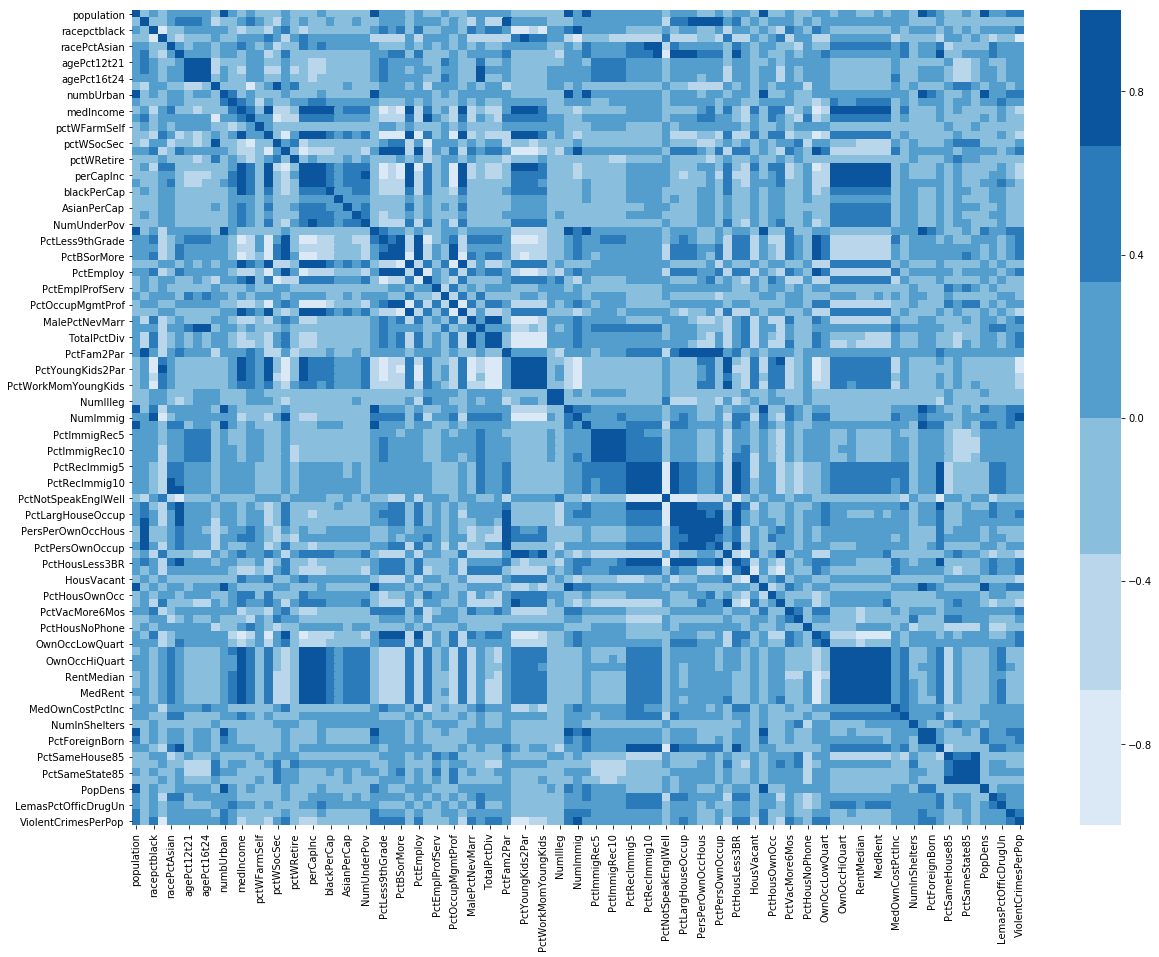

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings('ignore')
%matplotlib inline
X_data, y_data = load_data(ROOT_PATH + CRIME, skip_first_column=5, 
                           y_column_index=-1, needImpute=True)

data = pd.concat([X_data, y_data], axis=1)
correlation = data.corr()
fig = plt.figure(figsize=(20, 15))
sns.heatmap(correlation, vmin=-1, vmax=1, cmap=sns.color_palette("Blues"))
plt.show()

### (d) Calculate the Coefficient of Variation <i>CV</i> for each feature, where <i>CV</i> = s/m , in which s is sample standard deviation and m is sample mean.

In [8]:
X_data, y_data = load_data(ROOT_PATH + CRIME, skip_first_column=5, 
                           y_column_index=-1, needImpute=True)

data = pd.concat([X_data, y_data], axis=1)
cvFormula = lambda x: np.std(x) / np.mean(x)
cvResult = np.apply_along_axis(cvFormula, axis=0, arr=data.to_numpy())
print("The total {} features CV are: \n {}".format(len(cvResult), cvResult))

The total 101 features CV are: 
 [2.20294993 0.3532097  1.41056656 0.32370036 1.35882134 1.61387296
 0.36574812 0.29061999 0.49503634 0.42333552 2.00124163 0.63868866
 0.579608   0.32762787 0.69985456 0.35914986 0.36842021 0.6988552
 0.3495514  0.52759954 0.54549659 0.5074249  0.58932117 0.80948203
 0.60604183 0.67047639 0.47384086 2.30439167 0.75379109 0.67543079
 0.52815378 0.57825579 0.55599333 0.34724014 0.5104523  0.39812581
 0.5083338  0.422      0.39548416 0.40371035 0.3591826  0.371375
 0.31687526 0.33052823 0.3323925  0.32934323 0.32846855 0.33616412
 0.33263868 2.99344555 0.91957222 2.89976977 0.6840295  0.58474358
 0.50478324 0.45555177 1.29977426 1.29730638 1.28091166 1.28371176
 0.28860078 1.45870069 0.73435052 0.75691886 0.36682182 0.31932719
 0.46833631 0.3502283  1.1269169  0.34828327 0.81068443 1.9582885
 0.26957935 0.33745632 1.0644754  0.43600961 0.47029345 0.91798069
 0.84853101 0.84766758 0.87852946 0.8745136  0.63302762 0.56174345
 0.58686703 0.55545314 0.34574279

### (e) Pick floor(sqrt(128)) features with highest <i>CV</i> , and make scatter plots and box plots for them. Can you draw conclusions about significance of those features, just by the scatter plots?

#### scatter plots

In [9]:
CRIME_REMAIN_COLUMNS = ['population','householdsize','racepctblack','racePctWhite','racePctAsian','racePctHisp','agePct12t21','agePct12t29','agePct16t24','agePct65up','numbUrban','pctUrban','medIncome','pctWWage','pctWFarmSelf','pctWInvInc','pctWSocSec','pctWPubAsst','pctWRetire','medFamInc','perCapInc','whitePerCap','blackPerCap','indianPerCap','AsianPerCap','OtherPerCap','HispPerCap','NumUnderPov','PctPopUnderPov','PctLess9thGrade','PctNotHSGrad','PctBSorMore','PctUnemployed','PctEmploy','PctEmplManu','PctEmplProfServ','PctOccupManu','PctOccupMgmtProf','MalePctDivorce','MalePctNevMarr','FemalePctDiv','TotalPctDiv','PersPerFam','PctFam2Par','PctKids2Par','PctYoungKids2Par','PctTeen2Par','PctWorkMomYoungKids','PctWorkMom','NumIlleg','PctIlleg','NumImmig','PctImmigRecent','PctImmigRec5','PctImmigRec8','PctImmigRec10','PctRecentImmig','PctRecImmig5','PctRecImmig8','PctRecImmig10','PctSpeakEnglOnly','PctNotSpeakEnglWell','PctLargHouseFam','PctLargHouseOccup','PersPerOccupHous','PersPerOwnOccHous','PersPerRentOccHous','PctPersOwnOccup','PctPersDenseHous','PctHousLess3BR','MedNumBR','HousVacant','PctHousOccup','PctHousOwnOcc','PctVacantBoarded','PctVacMore6Mos','MedYrHousBuilt','PctHousNoPhone','PctWOFullPlumb','OwnOccLowQuart','OwnOccMedVal','OwnOccHiQuart','RentLowQ','RentMedian','RentHighQ','MedRent','MedRentPctHousInc','MedOwnCostPctInc','MedOwnCostPctIncNoMtg','NumInShelters','NumStreet','PctForeignBorn','PctBornSameState','PctSameHouse85','PctSameCity85','PctSameState85','LandArea','PopDens','PctUsePubTrans','LemasPctOfficDrugUn','ViolentCrimesPerPop']

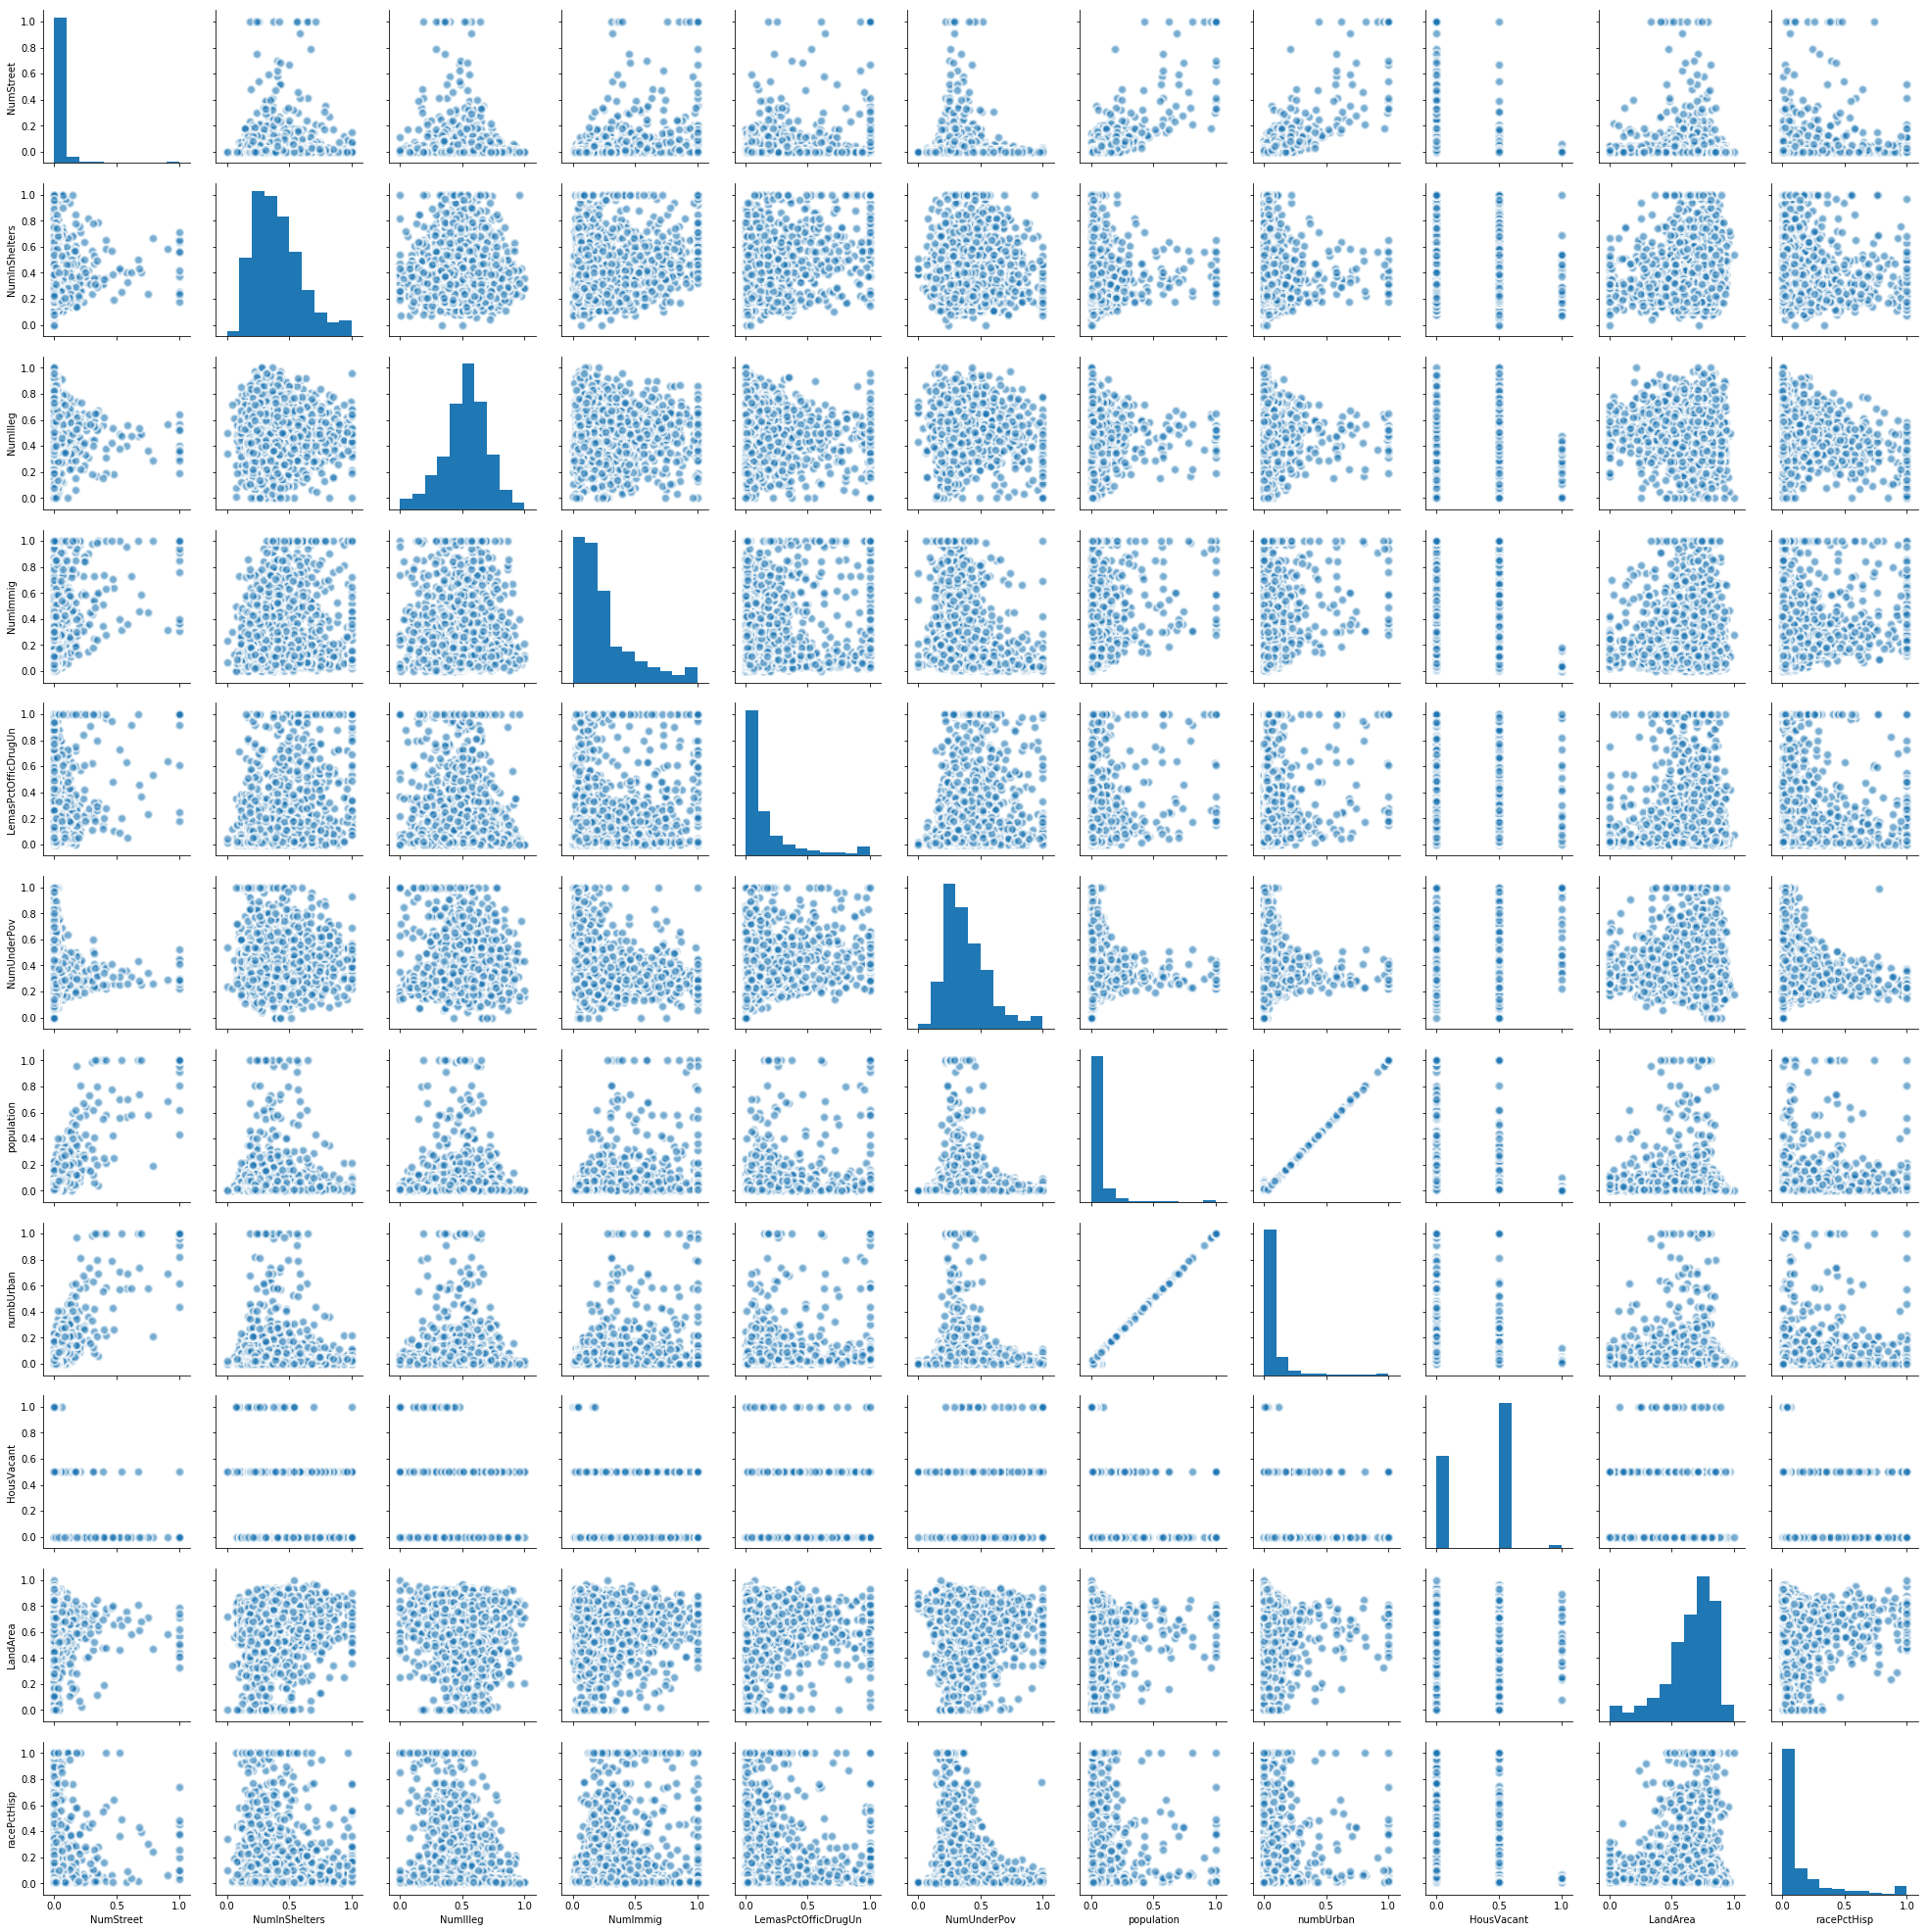

In [10]:
from math import sqrt, floor
data = pd.concat([X_data, y_data], axis=1)
cvFormula = lambda x: np.std(x) / np.mean(x)
cvResult = np.apply_along_axis(cvFormula, axis=0, arr=data.to_numpy())

first_sqrt_128 = floor(sqrt(128))
cvResultIndexes = np.argsort(-cvResult)[:first_sqrt_128]
highestCVFeatureNames = np.array(CRIME_REMAIN_COLUMNS)[cvResultIndexes]
renderData = X_data[highestCVFeatureNames]

sns.pairplot(renderData, plot_kws=dict(s=80, edgecolor="white", linewidth=2.5, alpha=0.6))
plt.show()

#### boxplots

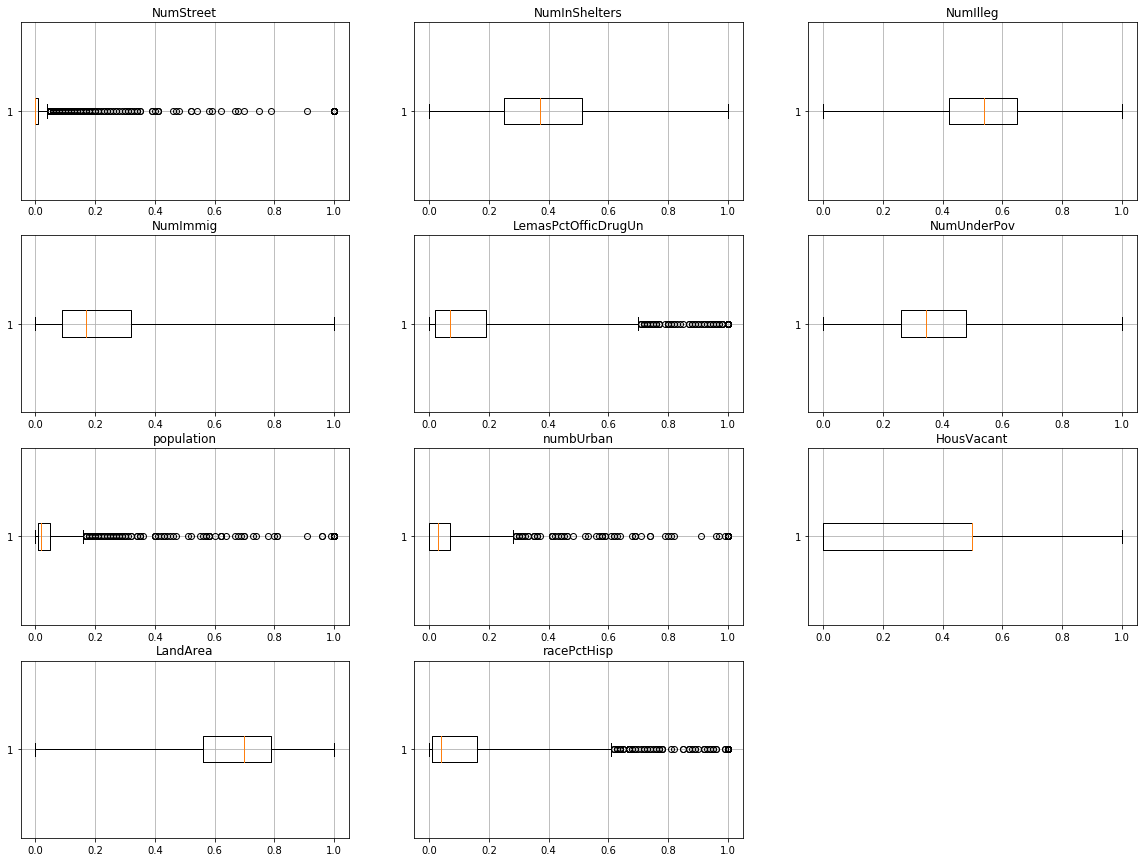

In [11]:
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(20, 15))

index = 0
for a in range(0, 4):
    for b in range(0, 3):
        if index < 11:
            ax[a, b].boxplot(renderData.loc[:, highestCVFeatureNames[index]], whis=3, vert=False)
            ax[a, b].grid(True)
            ax[a, b].title.set_text(highestCVFeatureNames[index])
            b, index = b + 1, index + 1

ax[3, 2].remove()
plt.show()

### (f) Fit a linear model using least squares to the training set and report the test error.

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split_by_size(X_data, y_data, train_size=1495, 
                                                            random_state=2333)

linReg = LinearRegression().fit(X_train, y_train)
y_predict = linReg.predict(X_test)
print("-----------\"Mean Square Error\"-------------")
print("Mean Square Error : ", mean_squared_error(y_test, y_predict))
print("-----------\"Score\"-------------")
print("Score : ", linReg.score(X_test, y_test))

-----------"Mean Square Error"-------------
Mean Square Error :  0.019183263776179137
-----------"Score"-------------
Score :  0.6458883541729512


### (g) Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained.

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler

def RidgeRegressionCV():
	return Pipeline([
		('std_sclaer', StandardScaler()),
		('ridge_reg', RidgeCV(cv=10))
	])

ridgeCV = RidgeRegressionCV().fit(X_train, y_train)
y_predict = ridgeCV.predict(X_test)
print("-----------\"Mean Square Error\"-------------")
print("Mean Square Error : ", mean_squared_error(y_test, y_predict))
print("-----------\"Score\"-------------")
print("Score : ", ridgeCV.score(X_test, y_test))

-----------"Mean Square Error"-------------
Mean Square Error :  0.018943716131193094
-----------"Score"-------------
Score :  0.6503102613004201


### (h) Fit a LASSO model on the training set, with λ chosen by cross-validation. Report the test error obtained, along with a list of the variables selected by the model. Repeat with standardized features. Report the test error for both cases and compare them.

In [14]:
from sklearn.linear_model import LassoCV

def LassoRegressionCV():
	return Pipeline([
		('std_sclaer', StandardScaler()),
		('lasso_cv', LassoCV(cv=10, random_state=233))
	])

lassoNormalizedReg = LassoCV(cv=10, random_state=233).fit(X_train, y_train)
y_predict = lassoNormalizedReg.predict(X_test)
print("-----------\"Mean Square Error(Normalized)\"-------------")
print("Mean Square Error : ", mean_squared_error(y_test, y_predict))
print("-----------\"Score\"-------------")
print("Score : ", lassoNormalizedReg.score(X_test, y_test))

lassoStandardizedReg = LassoRegressionCV().fit(X_train, y_train)
y_predict = lassoStandardizedReg.predict(X_test)
print("-----------\"Mean Square Error(Standardized)\"-------------")
print("Mean Square Error : ", mean_squared_error(y_test, y_predict))
print("-----------\"Score\"-------------")
print("Score : ", lassoStandardizedReg.score(X_test, y_test))

-----------"Mean Square Error(Normalized)"-------------
Mean Square Error :  0.01888120749472343
-----------"Score"-------------
Score :  0.6514641335714235
-----------"Mean Square Error(Standardized)"-------------
Mean Square Error :  0.018833323423590845
-----------"Score"-------------
Score :  0.6523480450598698


### (i) Fit a PCR model on the training set, with <i>M</i> (the number of principal components) chosen by cross-validation. Report the test error obtained.

In [15]:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale

linReg = LinearRegression()
mse = list()
score = -1 * cross_val_score(linReg, np.ones((len(X_train), 1)), y_train, cv=10,
                             scoring='neg_mean_squared_error').mean()
mse.append(score)
for m in range(1, X_data.shape[1]):
    pca = PCA(n_components=m)
    X_train_reduced = pca.fit_transform(scale(X_train))
    mse.append(-1 * cross_val_score(linReg, X_train_reduced, y_train, cv=10,
                                    scoring='neg_mean_squared_error').mean())

bestM = np.argsort(mse)[0]
print("-----------\"Best M\"-------------")
print("Best M : ", bestM)
pca = PCA(n_components=bestM)
X_train_reduced = pca.fit_transform(scale(X_train))
X_test_reduced = pca.fit_transform(scale(X_test))
bestReg = LinearRegression().fit(X_train_reduced, y_train)
y_predict = bestReg.predict(X_test_reduced)
print("-----------\"Mean Square Error\"-------------")
print("Mean Square Error : ", mean_squared_error(y_test, y_predict))

-----------"Best M"-------------
Best M :  81
-----------"Mean Square Error"-------------
Mean Square Error :  0.11724534432828654


### (j) In this section, we would like to fit a boosting tree to the data. As in classification trees, one can use any type of regression at each node to build a multivariate regression tree. Because the number of variables is large in this problem, one can use L1-penalized regression at each node. Such a tree is called L1 penalized gradient boosting tree. You can use XGBoost to fit the model tree. Determine α (the regularization term) using cross-validation.

Best parameters alpha : {'reg_alpha': 0.0001}


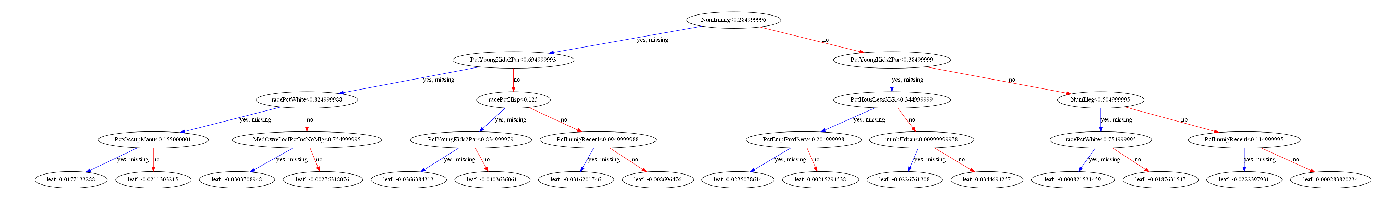

In [16]:
import xgboost as xgb
import matplotlib.pyplot
from sklearn.model_selection import GridSearchCV

d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

xgb_clf = xgb.XGBRegressor(n_estimators=100, max_depth=4, 
                           objective="reg:squarederror", silent=False)

parameters = {'reg_alpha': [1e-5, 1e-4, 1e-3, 0.01, 0.1]}
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=parameters, cv=10, n_jobs=-1)

grid_search.fit(X_train, y_train)
print("Best parameters alpha :", grid_search.best_params_)

xgb.plot_tree(grid_search.best_estimator_, num_trees=1)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(24, 14)
matplotlib.pyplot.show()

## 2. Tree-Based Methods

### (a) Download the APS Failure data from: https://archive.ics.uci.edu/ml/datasets/ APS+Failure+at+Scania+Trucks . The dataset contains a training set and a test set. The training set contains 60,000 rows, of which 1,000 belong to the positive class and 171 columns, of which one is the class column. All attributes are numeric.

In [17]:
APS_FULL_COLUMNS = ["class","aa_000","ab_000","ac_000","ad_000","ae_000","af_000","ag_000","ag_001","ag_002","ag_003","ag_004","ag_005","ag_006","ag_007","ag_008","ag_009","ah_000","ai_000","aj_000","ak_000","al_000","am_0","an_000","ao_000","ap_000","aq_000","ar_000","as_000","at_000","au_000","av_000","ax_000","ay_000","ay_001","ay_002","ay_003","ay_004","ay_005","ay_006","ay_007","ay_008","ay_009","az_000","az_001","az_002","az_003","az_004","az_005","az_006","az_007","az_008","az_009","ba_000","ba_001","ba_002","ba_003","ba_004","ba_005","ba_006","ba_007","ba_008","ba_009","bb_000","bc_000","bd_000","be_000","bf_000","bg_000","bh_000","bi_000","bj_000","bk_000","bl_000","bm_000","bn_000","bo_000","bp_000","bq_000","br_000","bs_000","bt_000","bu_000","bv_000","bx_000","by_000","bz_000","ca_000","cb_000","cc_000","cd_000","ce_000","cf_000","cg_000","ch_000","ci_000","cj_000","ck_000","cl_000","cm_000","cn_000","cn_001","cn_002","cn_003","cn_004","cn_005","cn_006","cn_007","cn_008","cn_009","co_000","cp_000","cq_000","cr_000","cs_000","cs_001","cs_002","cs_003","cs_004","cs_005","cs_006","cs_007","cs_008","cs_009","ct_000","cu_000","cv_000","cx_000","cy_000","cz_000","da_000","db_000","dc_000","dd_000","de_000","df_000","dg_000","dh_000","di_000","dj_000","dk_000","dl_000","dm_000","dn_000","do_000","dp_000","dq_000","dr_000","ds_000","dt_000","du_000","dv_000","dx_000","dy_000","dz_000","ea_000","eb_000","ec_00","ed_000","ee_000","ee_001","ee_002","ee_003","ee_004","ee_005","ee_006","ee_007","ee_008","ee_009","ef_000","eg_000"]

### (b) Data Preparation
### This data set has missing values. When the number of data with missing values is significant, discarding them is not a good idea.

#### i. Research what types of techniques are usually used for dealing with data with missing values. Pick at least one of them and apply it to this data in the next steps.

In [18]:
X_data, y_data = load_data(ROOT_PATH + APS_TRAIN, skip_first_row=21, y_column_index=0,
                           assignedColumnNames=APS_FULL_COLUMNS, missingSymbol='na', 
                           needImpute=True, dropOrNot=False)
print("------------------------------X_data (First 5 rows)------------------------------------")
print(X_data.head())
print("------------------------------y_data (First 5 rows)------------------------------------")
print(y_data.head())

print("------------------------------Missing Feature's Info-----------------------------------")
# existence larger than 2/3 use mean strategy
missing_columns = X_data.columns[X_data.isnull().any()]
print(X_data[missing_columns].describe())

------------------------------X_data (First 5 rows)------------------------------------
   aa_000 ab_000        ac_000         ad_000  ae_000  af_000  ag_000  ag_001  \
0   76698    NaN  2.130706e+09     280.000000     0.0     0.0     0.0     0.0   
1   33058    NaN  0.000000e+00  190620.639314     0.0     0.0     0.0     0.0   
2   41040    NaN  2.280000e+02     100.000000     0.0     0.0     0.0     0.0   
3      12      0  7.000000e+01      66.000000     0.0    10.0     0.0     0.0   
4   60874    NaN  1.368000e+03     458.000000     0.0     0.0     0.0     0.0   

   ag_002  ag_003  ...     ee_002    ee_003    ee_004    ee_005    ee_006  \
0     0.0     0.0  ...  1240520.0  493384.0  721044.0  469792.0  339156.0   
1     0.0     0.0  ...   421400.0  178064.0  293306.0  245416.0  133654.0   
2     0.0     0.0  ...   277378.0  159812.0  423992.0  409564.0  320746.0   
3     0.0   318.0  ...      240.0      46.0      58.0      44.0      10.0   
4     0.0     0.0  ...   622012.0  22979

- Tips: I have no idea how to impute these missing value, so I drop it. Even though I found other people replace by mean  value, <br/>I dont think it is a good idea. When there are nearly 60 percentage of data is missing, imputation by mean  value wont <br/>make any chance. So, In the following questions, some of them I use 171 -10 = 161 columns data

#### ii. For each of the 170 features, calculate the coefficient of variation CV = s/m, where s is sample standard deviation and m is sample mean.

In [19]:
def to_binary_numeric(y_data, classNeg="neg"):
    if isinstance(y_data, pd.DataFrame):
        y_data = y_data.to_numpy()

    y_data = np.array([1 if x == classNeg else 0 for x in y_data])
    return pd.DataFrame(y_data)

In [20]:
X_data, y_data = load_data(ROOT_PATH + APS_TRAIN, skip_first_row=21, y_column_index=0,
                           assignedColumnNames=APS_FULL_COLUMNS, missingSymbol='na', 
                           needImpute=True, dropOrNot=True)

y_data = to_binary_numeric(y_data, classNeg="neg")
data = pd.concat([y_data, X_data], axis=1)
cvFormula = lambda x: np.std(x) / np.mean(x)
cvResult = np.apply_along_axis(cvFormula, axis=0, arr=data.to_numpy())
print("The total {} features CV are (first 20 rows): \n {}".format(len(cvResult), cvResult[:20]))

The total 161 features CV are (first 20 rows): 
 [1.30188911e-01 2.45091715e+00 2.16974844e+00 1.83846088e+02
 2.31907434e+01 1.86587656e+01 9.18777990e+01 3.48546596e+01
 1.73689987e+01 8.54997778e+00 5.40143368e+00 2.92706769e+00
 2.34490753e+00 2.83346048e+00 6.15453179e+00 3.29840762e+01
 2.30016808e+00 1.80125316e+01 4.38014574e+01 7.45260669e+01]


#### iii. Plot a correlation matrix for your features using pandas or any other tool.

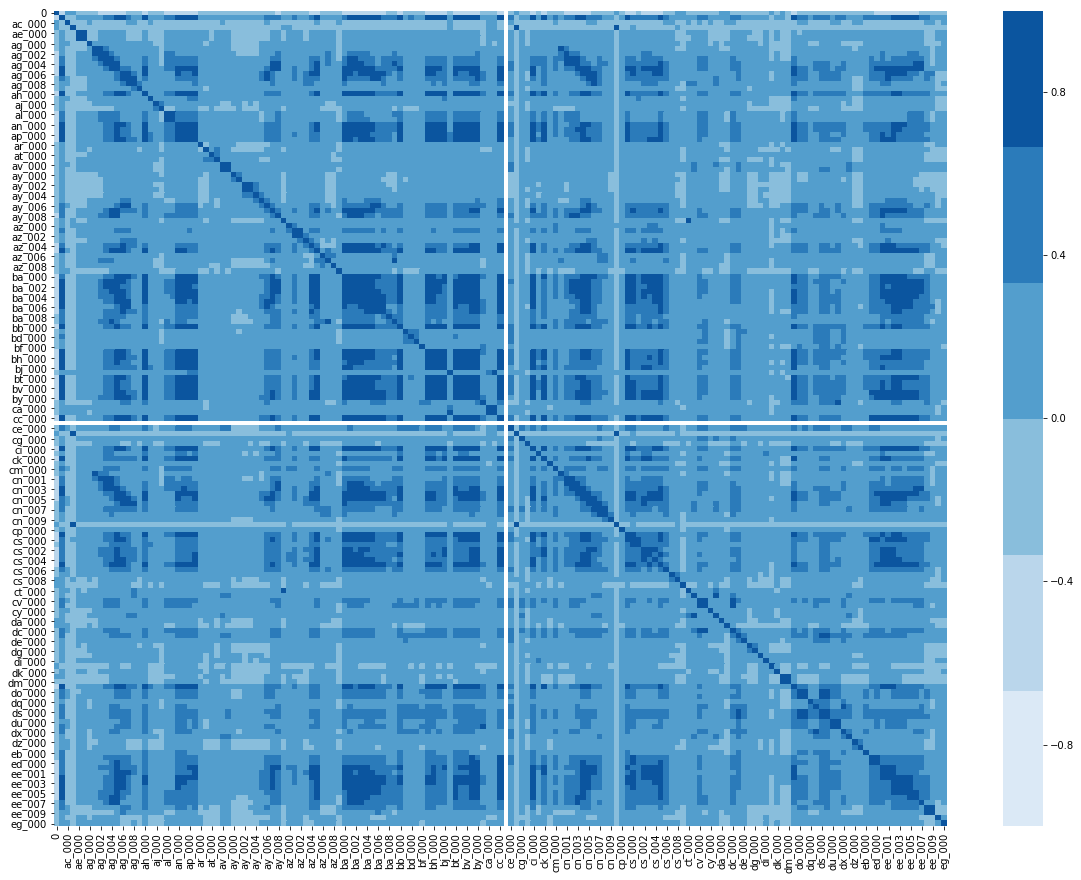

In [21]:
correlation = data.corr()
fig = plt.figure(figsize=(20, 15))
sns.heatmap(correlation, vmin=-1, vmax=1, cmap=sns.color_palette("Blues"))
plt.show()

#### iv. Pick floor(sqrt(170)) features with highest CV , and make scatter plots and box plots for them, similar to those on p. 129 of ISLR. Can you draw conclusions about significance of those features, just by the scatter plots? This does not meanthat you will only use those features in the following questions. We picked them only for visualization.

##### scatter plots

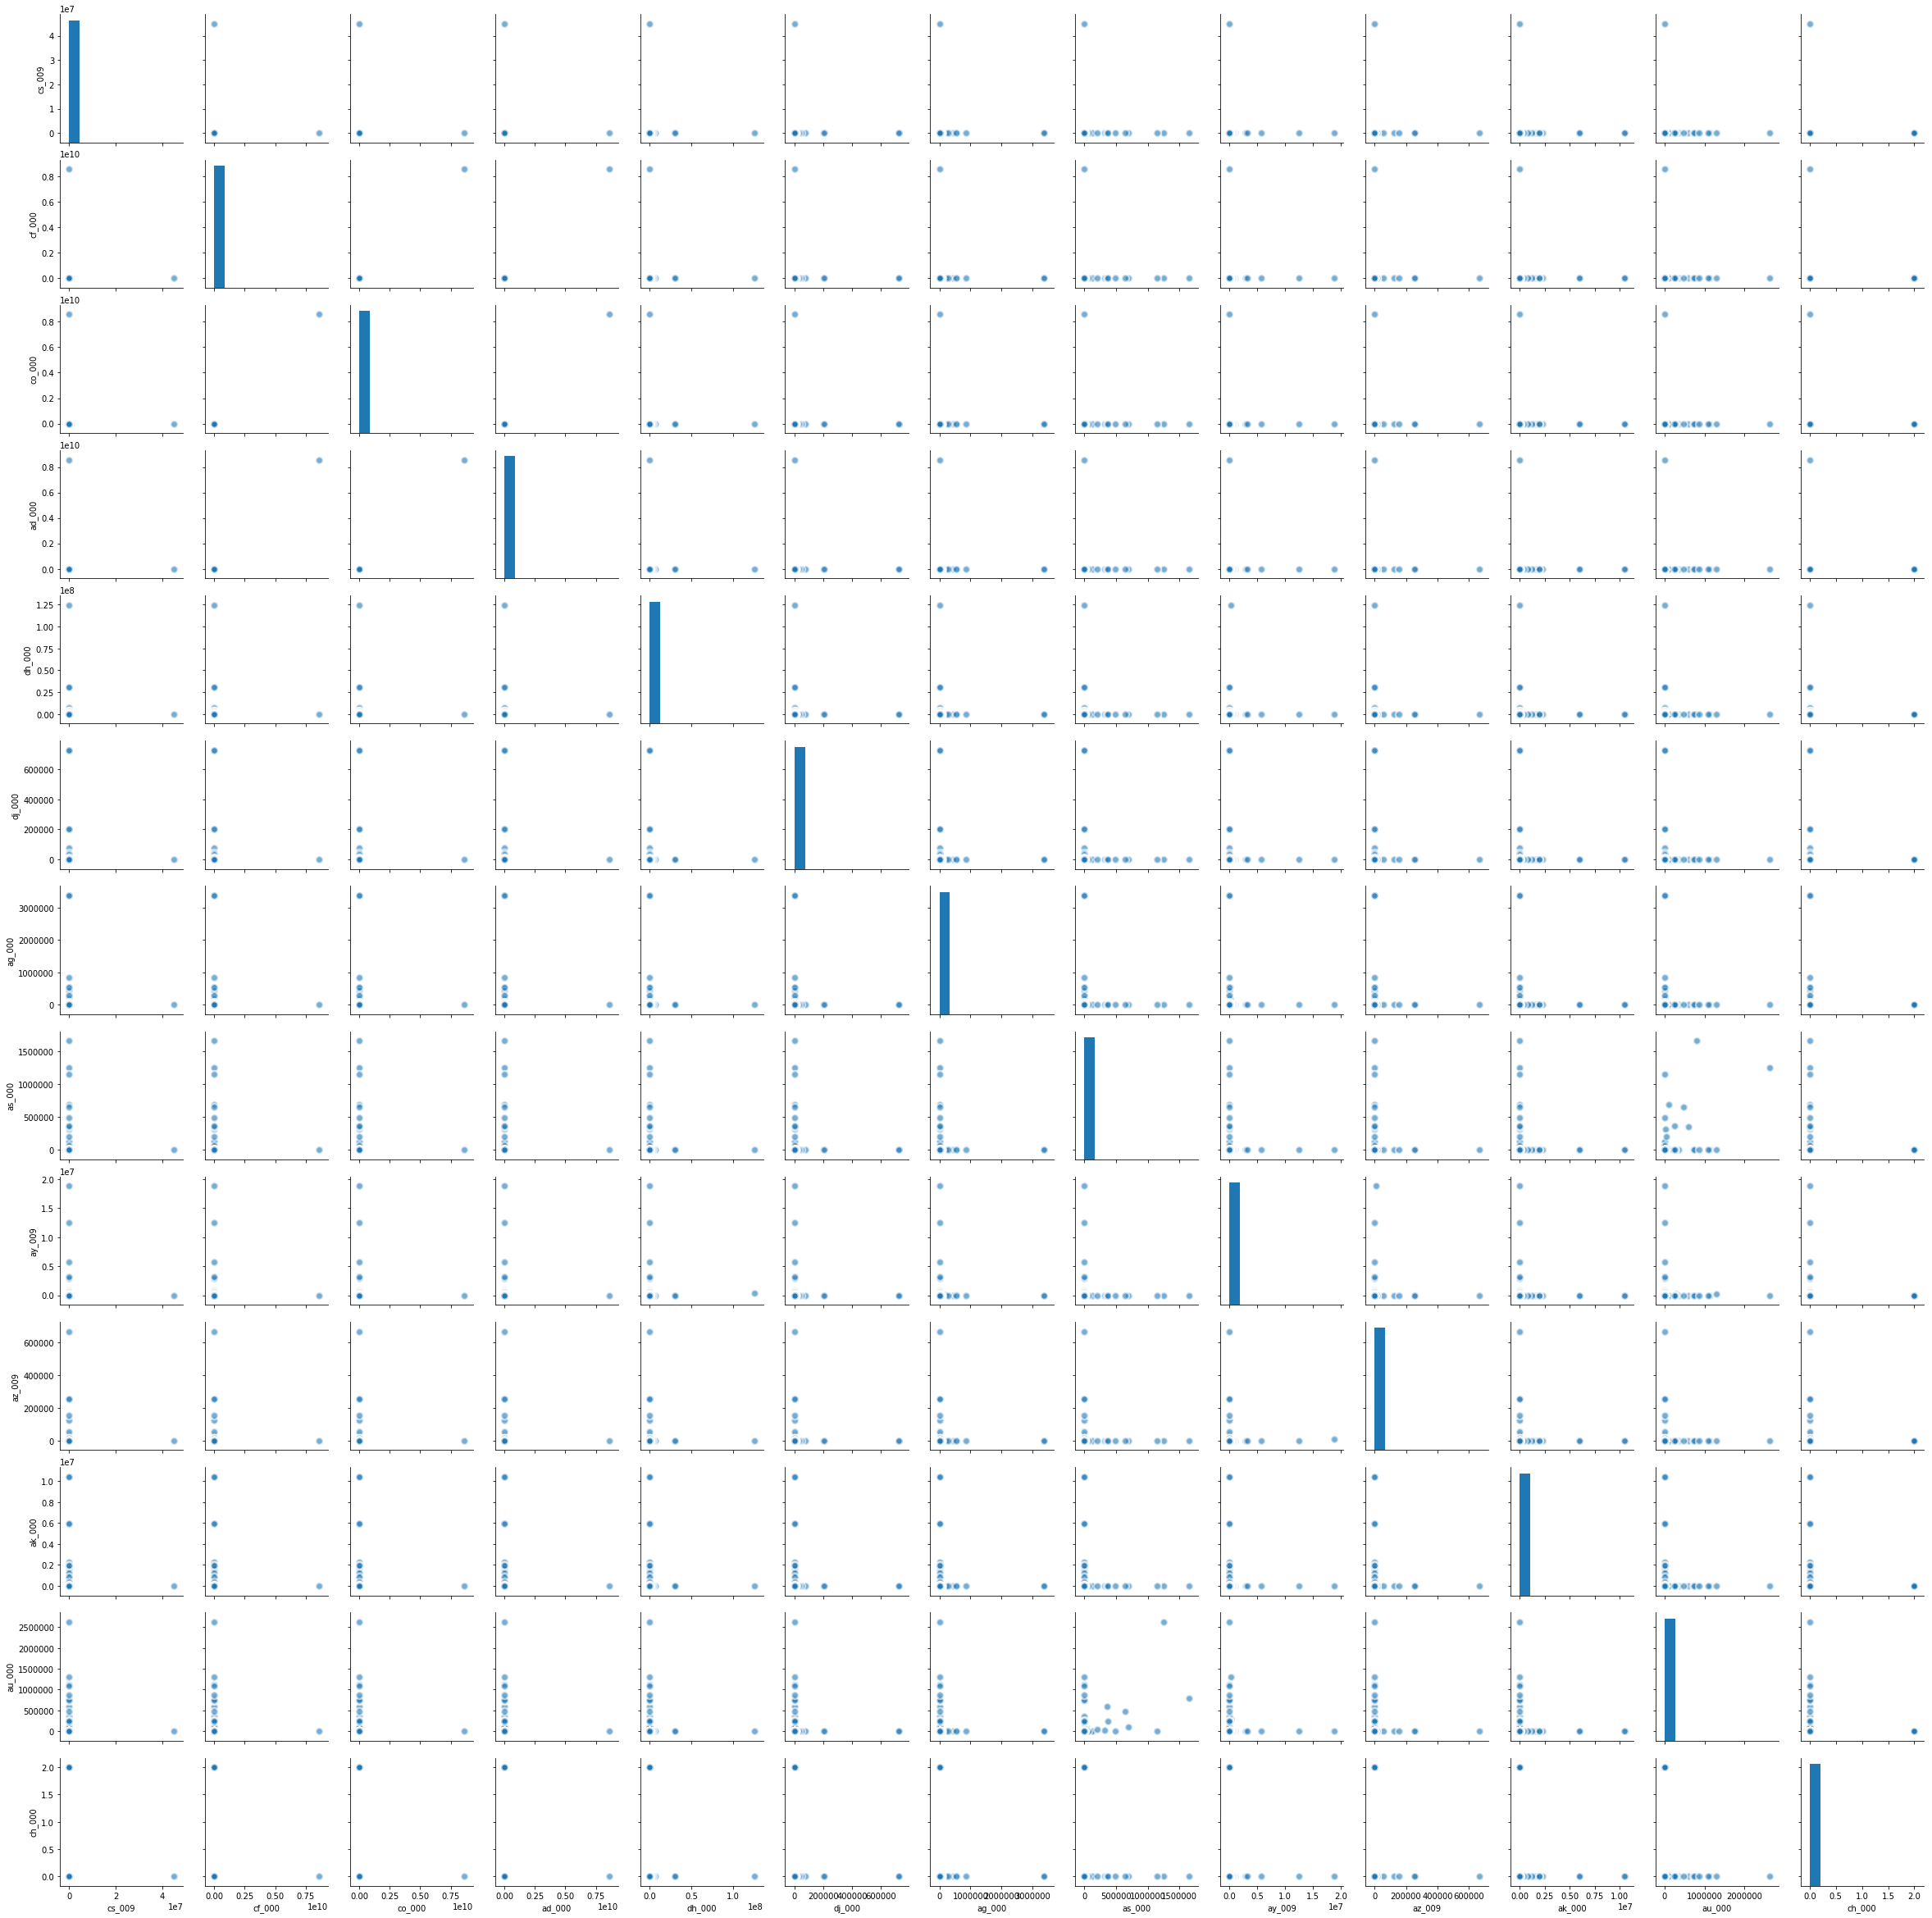

In [22]:
cvFormula = lambda x: np.std(x) / np.mean(x)
cvResult = np.apply_along_axis(cvFormula, axis=0, arr=data.to_numpy())

first_sqrt_170 = floor(sqrt(170))
cvResultIndexes = np.argsort(-cvResult)[:first_sqrt_170]
highestCVFeatureNames = np.array(list(data.columns.values))[cvResultIndexes]
renderData = X_data[highestCVFeatureNames]

sns.pairplot(renderData, plot_kws=dict(s=80, edgecolor="white", linewidth=2.5, alpha=0.6))
plt.show()

##### boxplots

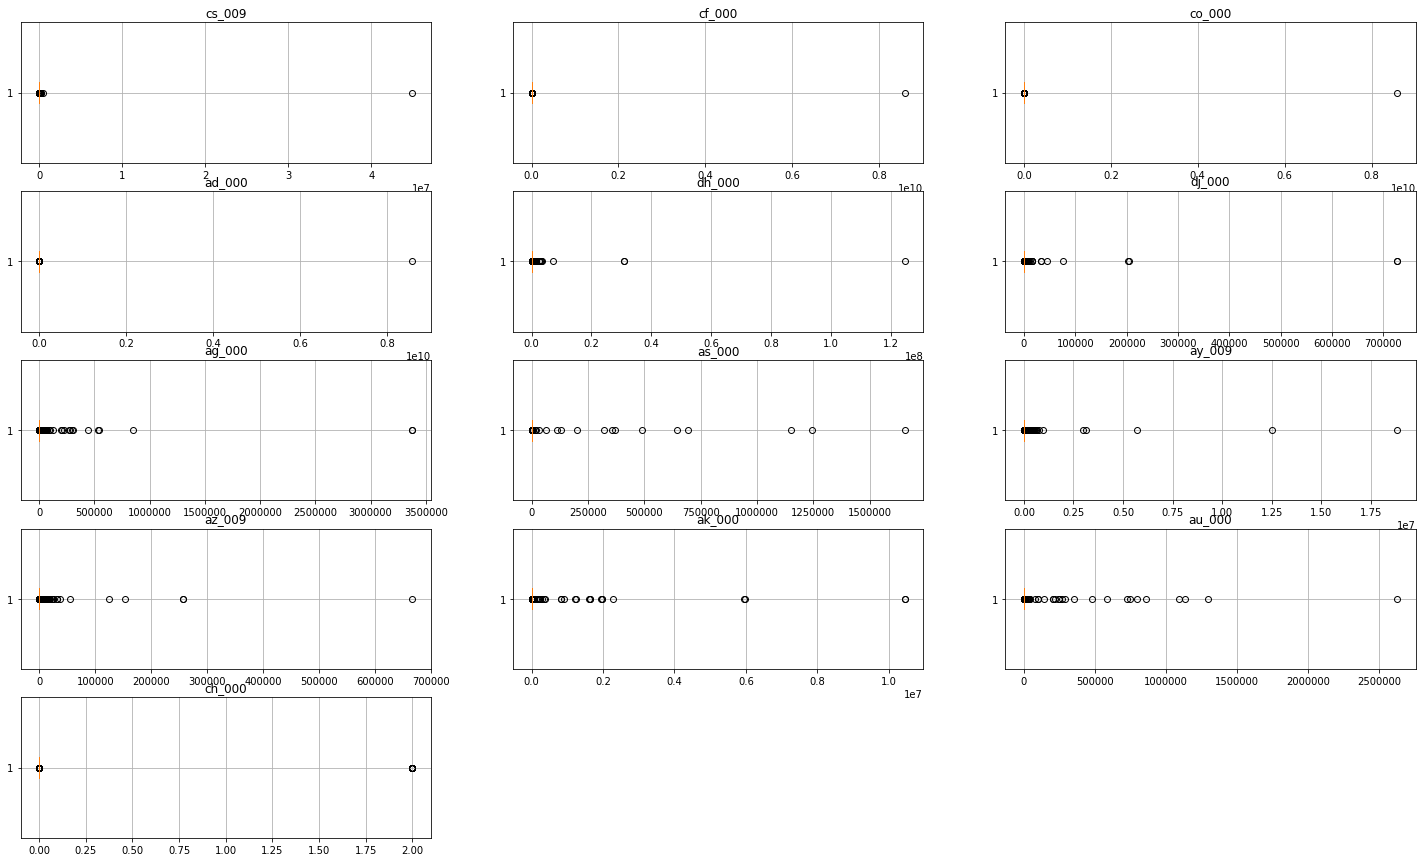

In [23]:
fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(25, 15))

index = 0
for a in range(0, 5):
    for b in range(0, 3):
        if index < 13:
            ax[a, b].boxplot(renderData.loc[:, highestCVFeatureNames[index]], whis=2, vert=False)
            ax[a, b].grid(True)
            ax[a, b].title.set_text(highestCVFeatureNames[index])
            b, index = b + 1, index + 1

ax[4, 1].remove()
ax[4, 2].remove()
plt.show()

#### v. Determine the number of positive and negative data. Is this data set imbalanced?

In [24]:
def count_neg_and_pos(y_data):
	y_value = to_binary_numeric(y_data)
	num_neg = np.count_nonzero(y_value)
	return len(y_value) - num_neg, num_neg

In [25]:
X_train, y_train = load_data(ROOT_PATH + APS_TRAIN, skip_first_row=21, y_column_index=0,
                             assignedColumnNames=APS_FULL_COLUMNS, missingSymbol='na', 
                             needImpute=True,dropOrNot=False)

X_test, y_test = load_data(ROOT_PATH + APS_TEST, skip_first_row=21, y_column_index=0,
                           assignedColumnNames=APS_FULL_COLUMNS, missingSymbol='na', 
                           needImpute=True,dropOrNot=False)

train_num_pos, train_num_neg = count_neg_and_pos(y_train)
test_num_pos, test_num_neg = count_neg_and_pos(y_test)
print("the number of pos data is : ", train_num_pos + test_num_pos)
print("the number of neg data is : ", train_num_neg + test_num_neg)

the number of pos data is :  1375
the number of neg data is :  74625


### (c) Train a random forest to classify the data set. Do NOT compensate for class imbalance in the data set. Calculate the confusion matrix, ROC, AUC, and misclassification for training and test sets and report them (You may use pROC package). Calculate Out of Bag error estimate for your random forset and compare it to the test error

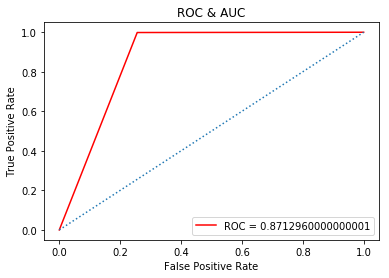

-----------"OOB Score"-------------
0.9935666666666667


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

X_train, y_train = load_data(ROOT_PATH + APS_TRAIN, skip_first_row=21, y_column_index=0,
                             assignedColumnNames=APS_FULL_COLUMNS, missingSymbol='na', 
                             needImpute=True,dropOrNot=True)

X_test, y_test = load_data(ROOT_PATH + APS_TEST, skip_first_row=21, y_column_index=0,
                           assignedColumnNames=APS_FULL_COLUMNS, missingSymbol='na', 
                           needImpute=True,dropOrNot=True)

y_train = to_binary_numeric(y_train, classNeg="neg")
y_test = to_binary_numeric(y_test, classNeg="neg")

randForestClf = RandomForestClassifier(n_estimators=50, random_state=2333, oob_score=True)
randForestClf.fit(X_train, y_train)
y_predict = randForestClf.predict(X_test)
falsePositiveRate, truePositiveRate, thresholds = roc_curve(y_test, y_predict)
# compute Area Under the Curve (AUC) using the trapezoidal rule
area = auc(falsePositiveRate, truePositiveRate)

plt.plot(falsePositiveRate, truePositiveRate, color='red', label='ROC = ' + str(area))
plt.plot([0, 1], [0, 1], linestyle='dotted')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC & AUC')
plt.legend()
plt.show()
print("-----------\"OOB Score\"-------------")
print(randForestClf.oob_score_)

### (d) Research how class imbalance is addressed in random forests. Compensate for class imbalance in your random forest and repeat 2c. Compare the results with those of 2c.

Using TensorFlow backend.


-----------"After Using SMOTE: (Train)"-------------
1    59000
0    59000
Name: class, dtype: int64
-----------"After Using SMOTE: (Test)"-------------
1    15625
0    15625
Name: class, dtype: int64


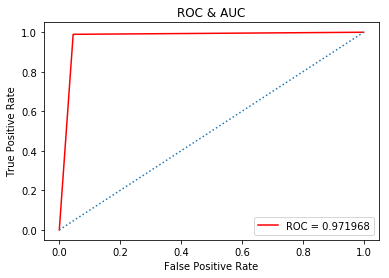

-----------"OOB Score"-------------
0.9966694915254237


In [27]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=2333)
smote_train_fit = smote.fit_sample(X_train, y_train)
smote_test_fit = smote.fit_sample(X_test, y_test)
X_train_smote = pd.DataFrame(smote_train_fit[0])
y_train_smote = pd.DataFrame(smote_train_fit[1], columns=['class'])
X_test_smote = pd.DataFrame(smote_test_fit[0])
y_test_smote = pd.DataFrame(smote_test_fit[1], columns=['class'])

print("-----------\"After Using SMOTE: (Train)\"-------------")
print(y_train_smote['class'].value_counts())
print("-----------\"After Using SMOTE: (Test)\"-------------")
print(y_test_smote['class'].value_counts())

randForestClf = RandomForestClassifier(n_estimators=50, random_state=2333, oob_score=True)
randForestClf.fit(X_train_smote, y_train_smote)
y_predict = randForestClf.predict(X_test_smote)
falsePositiveRate, truePositiveRate, thresholds = roc_curve(y_test_smote, y_predict)
# compute Area Under the Curve (AUC) using the trapezoidal rule
area = auc(falsePositiveRate, truePositiveRate)

plt.plot(falsePositiveRate, truePositiveRate, color='red', label='ROC = ' + str(area))
plt.plot([0, 1], [0, 1], linestyle='dotted')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC & AUC')
plt.legend()
plt.show()
print("-----------\"OOB Score\"-------------")
print(randForestClf.oob_score_)

### (e) Model Trees

### In the case of a univariate tree, only one input dimension is used at a tree split. In a multivariate tree, or model tree, at a decision node all input dimensions can be used and thus it is more general. In univariate classification trees, majority polling is used at each node to determine the split of that node as the decision rule. In model trees, a (linear) model that relies on all of the variables is used to determine the split of that node (i.e. instead of using $X_j > s$ as the decision rule, one has $\sum_{j=1}^{\infty} \beta_j X_j > s$. as the decision rule). Alternatively, in a regression tree, instead of using average in the region associated with each node, a linear regression model is used to determine the value associated with that node. One of the methods that can be used at each node is Logistic Regression. One can use scikit learn to call Weka to train Logistic Model Trees for classification. Train Logistic Model Trees for the APS data set without compensation for class imbalance. Use one of 5 fold, 10 fold, and leave-one-out cross validation methods to estimate the error of your trained model and compare it with the test error. Report the Confusion Matrix, ROC, and AUC for training and test sets.

#### Weka LMT without compensation train data (5-folds)

I1014 09:16:02.504039 10188 jvm.py:83] Adding bundled jars
I1014 09:16:02.514031 10188 jvm.py:90] Classpath=['F:\\Anaconda3\\lib\\site-packages\\javabridge\\jars\\rhino-1.7R4.jar', 'F:\\Anaconda3\\lib\\site-packages\\javabridge\\jars\\runnablequeue.jar', 'F:\\Anaconda3\\lib\\site-packages\\javabridge\\jars\\cpython.jar', 'F:\\Anaconda3\\lib\\site-packages\\weka\\lib\\python-weka-wrapper.jar', 'F:\\Anaconda3\\lib\\site-packages\\weka\\lib\\weka.jar']
I1014 09:16:02.516031 10188 jvm.py:91] MaxHeapSize=default
I1014 09:16:02.517030 10188 jvm.py:100] Package support disabled


Train CV (5-folds) Error = 0.85%
=== Confusion Matrix ===

     a     b   <-- classified as
 58817   183 |     a = neg
   325   675 |     b = pos

================="Summary"====================

Correctly Classified Instances       59492               99.1533 %
Incorrectly Classified Instances       508                0.8467 %
Kappa statistic                          0.7223
Mean absolute error                      0.011 
Root mean squared error                  0.0829
Relative absolute error                 33.5704 %
Root relative squared error             64.7929 %
Total Number of Instances            60000     



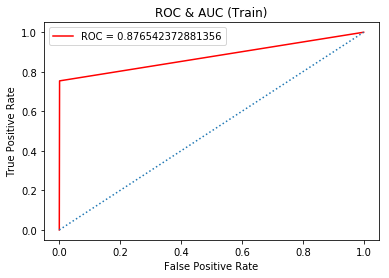

In [28]:
import weka.core.jvm as jvm

jvm.start()
import weka.core.converters as convert
from weka.classifiers import Classifier
from weka.classifiers import Evaluation
from weka.core.classes import Random

GENERATED_TRAIN_DATA_FILE_PATH = './gen_train_data_set.csv'

X_train, y_train = load_data(ROOT_PATH + APS_TRAIN, skip_first_row=21, y_column_index=0,
                             assignedColumnNames=APS_FULL_COLUMNS, missingSymbol='na',
                             needImpute=True, dropOrNot=True)

export_train_data = pd.concat([y_train, X_train], axis=1)

# export data to csv
export_train_data.to_csv(GENERATED_TRAIN_DATA_FILE_PATH, sep=',', index=False)
train_data = convert.load_any_file(filename=GENERATED_TRAIN_DATA_FILE_PATH)
train_data.class_is_first()

# load logistic model tree algorithm
log_tree = Classifier(classname="weka.classifiers.trees.LMT")
eval_train_obj = Evaluation(train_data)
eval_train_obj.crossvalidate_model(classifier=log_tree, data=train_data, 
                                   num_folds=5, rnd=Random(1))
print("Train CV (5-folds) Error = %.2f%%" % (eval_train_obj.percent_incorrect))
print(eval_train_obj.matrix())
print("=================\"Summary\"====================")
print(eval_train_obj.summary())

log_tree.build_classifier(train_data)
y_predict = eval_train_obj.test_model(log_tree, train_data)

y_train = to_binary_numeric(y_train, classNeg="neg")

falsePositiveRate, truePositiveRate, thresholds = roc_curve(y_train, y_predict, pos_label=0)
# compute Area Under the Curve (AUC) using the trapezoidal rule
area = auc(falsePositiveRate, truePositiveRate)

plt.plot(falsePositiveRate, truePositiveRate, color='red', label='ROC = ' + str(area))
plt.plot([0, 1], [0, 1], linestyle='dotted')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC & AUC (Train)')
plt.legend()
plt.show()

#### Weka LMT without compensation test data  (5-folds)

Test CV (5-folds) Error = 1.19%
=== Confusion Matrix ===

     a     b   <-- classified as
 15553    72 |     a = neg
   119   256 |     b = pos

================="Summary"====================

Correctly Classified Instances       15809               98.8063 %
Incorrectly Classified Instances       191                1.1938 %
Kappa statistic                          0.7222
Mean absolute error                      0.0158
Root mean squared error                  0.099 
Relative absolute error                 34.5681 %
Root relative squared error             65.4699 %
Total Number of Instances            16000     



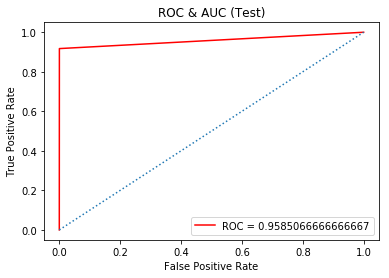

In [29]:
GENERATED_TEST_DATA_FILE_PATH = './gen_test_data_set.csv'

X_test, y_test = load_data(ROOT_PATH + APS_TEST, skip_first_row=21, y_column_index=0,
                           assignedColumnNames=APS_FULL_COLUMNS, missingSymbol='na', 
                           needImpute=True,dropOrNot=True)

export_test_data = pd.concat([y_test, X_test], axis=1)

# export data to csv
export_test_data.to_csv(GENERATED_TEST_DATA_FILE_PATH, sep=',', index=False)
test_data = convert.load_any_file(filename=GENERATED_TEST_DATA_FILE_PATH)
test_data.class_is_first()

# load logistic model tree algorithm
log_tree = Classifier(classname="weka.classifiers.trees.LMT")
eval_test_obj = Evaluation(test_data)
eval_test_obj.crossvalidate_model(classifier=log_tree, data=test_data, num_folds=5, rnd=Random(1))
print("Test CV (5-folds) Error = %.2f%%" % (eval_test_obj.percent_incorrect))
print(eval_test_obj.matrix())
print("=================\"Summary\"====================")
print(eval_test_obj.summary())

log_tree.build_classifier(test_data)
y_predict = eval_test_obj.test_model(log_tree, test_data)

y_test = to_binary_numeric(y_test, classNeg="neg")

falsePositiveRate, truePositiveRate, thresholds = roc_curve(y_test, y_predict, pos_label=0)
# compute Area Under the Curve (AUC) using the trapezoidal rule
area = auc(falsePositiveRate, truePositiveRate)

plt.plot(falsePositiveRate, truePositiveRate, color='red', label='ROC = ' + str(area))
plt.plot([0, 1], [0, 1], linestyle='dotted')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC & AUC (Test)')
plt.legend()
plt.show()

### (f) Use SMOTE (Synthetic Minority Over-sampling Technique) to pre-process your data to compensate for class imbalance.8 Train a Logistic Model Tree using the pre-processed data and repeat 2e. Do not forget that there is a right and a wrong way of cross validation here. Compare the uncompensated case with SMOTE

#### Weka LMT without compensation SMOTE train data  (5-folds)

SMOTE Train CV (5-folds) Error = 1.52%
=== Confusion Matrix ===

     a     b   <-- classified as
 57991  1009 |     a = neg
   781 58219 |     b = pos

================="Summary"====================

Correctly Classified Instances      116210               98.4831 %
Incorrectly Classified Instances      1790                1.5169 %
Kappa statistic                          0.9697
Mean absolute error                      0.0249
Root mean squared error                  0.1131
Relative absolute error                  4.9895 %
Root relative squared error             22.6242 %
Total Number of Instances           118000     



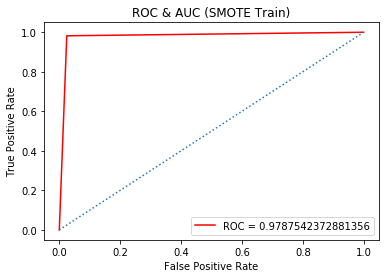

In [30]:
GENERATED_SMOTE_TRAIN_DATA_FILE_PATH = './gen_smote_train_data_set.csv'

X_train, y_train = load_data(ROOT_PATH + APS_TRAIN, skip_first_row=21, y_column_index=0,
                             assignedColumnNames=APS_FULL_COLUMNS, missingSymbol='na',
                             needImpute=True, dropOrNot=True)

smote = SMOTE(random_state=2333)
smote_train_fit = smote.fit_sample(X_train, y_train)
X_train_smote = pd.DataFrame(smote_train_fit[0])
y_train_smote = pd.DataFrame(smote_train_fit[1], columns=['class'])
export_smote_train_data = pd.concat([y_train_smote, X_train_smote], axis=1)

# export data to csv
export_smote_train_data.to_csv(GENERATED_SMOTE_TRAIN_DATA_FILE_PATH, sep=',', index=False)
smote_train_data = convert.load_any_file(filename=GENERATED_SMOTE_TRAIN_DATA_FILE_PATH)
smote_train_data.class_is_first()

# load logistic model tree algorithm
log_tree = Classifier(classname="weka.classifiers.trees.LMT")
eval_smote_train_obj = Evaluation(smote_train_data)
eval_smote_train_obj.crossvalidate_model(classifier=log_tree, data=smote_train_data, 
                                         num_folds=5, rnd=Random(1))
print("SMOTE Train CV (5-folds) Error = %.2f%%" % (eval_smote_train_obj.percent_incorrect))
print(eval_smote_train_obj.matrix())
print("=================\"Summary\"====================")
print(eval_smote_train_obj.summary())

log_tree.build_classifier(smote_train_data)
y_predict = eval_smote_train_obj.test_model(log_tree, smote_train_data)

y_train_smote = to_binary_numeric(y_train_smote, classNeg="neg")

falsePositiveRate, truePositiveRate, thresholds = roc_curve(y_train_smote, y_predict, pos_label=0)
# compute Area Under the Curve (AUC) using the trapezoidal rule
area = auc(falsePositiveRate, truePositiveRate)

plt.plot(falsePositiveRate, truePositiveRate, color='red', label='ROC = ' + str(area))
plt.plot([0, 1], [0, 1], linestyle='dotted')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC & AUC (SMOTE Train)')
plt.legend()
plt.show()

#### Weka LMT without compensation SMOTE test data  (5-folds)

SMOTE Test CV (5-folds) Error = 1.67%
=== Confusion Matrix ===

     a     b   <-- classified as
 15348   277 |     a = neg
   244 15381 |     b = pos

================="Summary"====================

Correctly Classified Instances       30729               98.3328 %
Incorrectly Classified Instances       521                1.6672 %
Kappa statistic                          0.9667
Mean absolute error                      0.03  
Root mean squared error                  0.1178
Relative absolute error                  6.0019 %
Root relative squared error             23.5575 %
Total Number of Instances            31250     



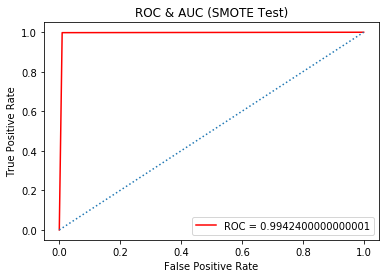

In [32]:
GENERATED_SMOTE_TEST_DATA_FILE_PATH = './gen_smote_test_data_set.csv'

X_test, y_test = load_data(ROOT_PATH + APS_TEST, skip_first_row=21, y_column_index=0,
                           assignedColumnNames=APS_FULL_COLUMNS, missingSymbol='na', 
                           needImpute=True, dropOrNot=True)

smote = SMOTE(random_state=2333)
smote_test_fit = smote.fit_sample(X_test, y_test)
X_test_smote = pd.DataFrame(smote_test_fit[0])
y_test_smote = pd.DataFrame(smote_test_fit[1], columns=['class'])
export_smote_test_data = pd.concat([y_test_smote, X_test_smote], axis=1)

# export data to csv
export_smote_test_data.to_csv(GENERATED_SMOTE_TEST_DATA_FILE_PATH, sep=',', index=False)
smote_test_data = convert.load_any_file(filename=GENERATED_SMOTE_TEST_DATA_FILE_PATH)
smote_test_data.class_is_first()

# load logistic model tree algorithm
log_tree = Classifier(classname="weka.classifiers.trees.LMT")
eval_smote_test_obj = Evaluation(smote_test_data)
eval_smote_test_obj.crossvalidate_model(classifier=log_tree, data=smote_test_data, 
                                        num_folds=5, rnd=Random(1))
print("SMOTE Test CV (5-folds) Error = %.2f%%" % (eval_smote_test_obj.percent_incorrect))
print(eval_smote_test_obj.matrix())
print("=================\"Summary\"====================")
print(eval_smote_test_obj.summary())

log_tree.build_classifier(smote_test_data)
y_predict = eval_smote_test_obj.test_model(log_tree, smote_test_data)

y_test_smote = to_binary_numeric(y_test_smote, classNeg="neg")

falsePositiveRate, truePositiveRate, thresholds = roc_curve(y_test_smote, y_predict, pos_label=0)
# compute Area Under the Curve (AUC) using the trapezoidal rule
area = auc(falsePositiveRate, truePositiveRate)

plt.plot(falsePositiveRate, truePositiveRate, color='red', label='ROC = ' + str(area))
plt.plot([0, 1], [0, 1], linestyle='dotted')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC & AUC (SMOTE Test)')
plt.legend()
plt.show()

## 3. ISLR 6.8.3

### Suppose we estimate the regression coefficients in a linear regression model by minimizing
![lslr6 8 3](https://user-images.githubusercontent.com/24391143/66796622-1597a480-eebd-11e9-9311-3c2498aed31f.PNG)
### for a particular value of s. For parts (a) through (e), indicate which of i. through v. is correct. Justify your answer
#### (a) As we increase s from 0, the training RSS will:
- i. Increase initially, and then eventually start decreasing in an inverted U shape.
- ii. Decrease initially, and then eventually start increasing in a U shape.
- iii. Steadily increase.
- iv. Steadily decrease.
- v. Remain constant.

When we increase the s, actually we remove the constraint we put on the coefficient. So the model becomes more flexible.
A flexible model, the training RSS will steadily decrease as the flexibility increase.

#### (b) Repeat (a) for test RSS.

the test RSS initially declines as flexibility increase but at some point, it levels off and then starts to increase again, like a U shape.

#### (c) Repeat (a) for variance.

the variance will become higher when the flexibility increase.

#### (d) Repeat (a) for (squared) bias.

the bias will become lower when the flexibility increase.

#### (e) Repeat (a) for the irreducible error.

remain constant. Since no matter how well we fit a model with trainning dataset, we cannot lower this error term.

## 4. ISLR 6.8.5

### It is well-known that ridge regression tends to give similar coefficient values to correlated variables, whereas the lasso may give quite different coefficient values to correlated variables. We will now explore this property in a very simple setting. Suppose that $n = 2, p = 2, x_{11} = x_{12}, x_{21} = x_{22}$ . Furthermore, suppose that $y_1 +y_2 = 0$ and $x_{11} +x_{21} = 0$ and $x_{12} + x_{22} = 0$, so that the estimate for the intercept in a least squares, ridge regression, or lasso model is zero: $\hat{β}_0 = 0$.

#### (a) Write out the ridge regression optimization problem in this setting.
#### (b) Argue that in this setting, the ridge coefficient estimates satisfy $\hat{β}_1 = \hat{β}_2$.
#### (c) Write out the lasso optimization problem in this setting.
#### (d) Argue that in this setting, the lasso coefficients $\hat{β}_1$ and $\hat{β}_2$ are not unique—in other words, there are many possible solutions to the optimization problem in (c). Describe these solutions

![lslr6_8_5](https://user-images.githubusercontent.com/24391143/67358834-67bc7380-f516-11e9-80b5-a72575e1fbf2.png)

## 5. ISLR 8.4.5

### Suppose we produce ten bootstrapped samples from a data set containing red and green classes. We then apply a classification tree to each bootstrapped sample and, for a specific value of X, produce 10 estimates of P(Class is Red|X):

<center><b>0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, and 0.75</b></center>

![lslr8 4 5](https://user-images.githubusercontent.com/24391143/66797091-855a5f00-eebe-11e9-8b99-acbc6528d8ff.PNG)

### There are two common ways to combine these results together into a single class prediction. One is the majority vote approach discussed in this chapter. The second approach is to classify based on the average probability. In this example, what is the final classification under each of these two approaches?

If we use majority vote method, e get 4 records less than 0.5 and 6 records bigger than 0.5. So we predict the X is red.
If we use avarage approach, the average of 10 records is 0.45, so we predict the X is not red.

## 6. ISLR 9.7.3

### Here we explore the maximal margin classifier on a toy data set.
#### (a) We are given n = 7 observations in p = 2 dimensions. For each observation, there is an associated class label.
![](https://user-images.githubusercontent.com/24391143/66797863-0155a680-eec1-11e9-9514-b8384a7070d1.PNG)

#### Sketch the observations.

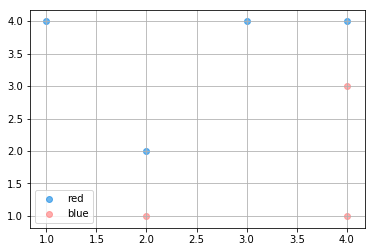

In [37]:
import numpy as np
import matplotlib.pyplot as plt
X = np.array([[3,4],[2,2],[4,4],[1,4],[2,1],[4,3],[4,1]])
y = np.array([1,1,1,1,0,0,0])
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="#0984e3", label='red', alpha=0.6)
plt.scatter(X[y == 0, 0], X[y == 0, 1], color="#ff7675", label='blue',alpha=0.6)
plt.grid(True)
plt.legend()

#### (b) Sketch the optimal separating hyperplane, and provide the equation for this hyperplane (of the form (9.1)).

we need to draw a line to pass through the middle point between (2,2) and (2,1), and the middle point between (4,3) and (4,4). By doing this way, we can maximize the margin.
So the optimal hyperplane equation is $y = x - 0.5$ or in other form $X_1 - X_2 - 0.5 = 0$

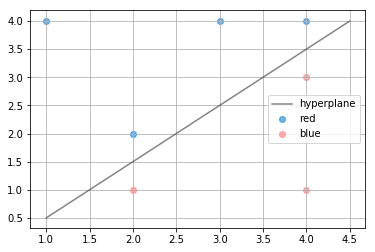

In [38]:
hyperplane_x = np.linspace(1, 4.5, 100)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="#0984e3", label='red', alpha=0.6)
plt.scatter(X[y == 0, 0], X[y == 0, 1], color="#ff7675", label='blue',alpha=0.6)
plt.plot(hyperplane_x, hyperplane_x - 0.5, color="#2d3436", label='hyperplane',alpha=0.6);
plt.grid(True)
plt.legend()

#### (c) Describe the classification rule for the maximal margin classifier. It should be something along the lines of “Classify to Red if $β_0 + β_1X_1 + β_2X_2 > 0$, and classify to Blue otherwise.” Provide the values for $β_0, β_1$, and $β_2$.

from the above figure, it is easily to know the upper margin line will pass through (2,2) and (4,4), and the bottom margin will pass (2,1) and (4,3). so the upper margin equation is $X_1 - X_2 = 0$ and the bottom line is $X_1 - X_2 - 1 = 0$

#### (d) On your sketch, indicate the margin for the maximal margin hyperplane.

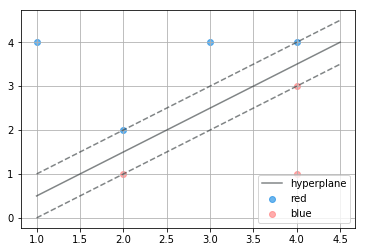

In [39]:
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="#0984e3", label='red', alpha=0.6)
plt.scatter(X[y == 0, 0], X[y == 0, 1], color="#ff7675", label='blue',alpha=0.6)
plt.plot(hyperplane_x, hyperplane_x, color="#2d3436", linestyle='--',alpha=0.6);
plt.plot(hyperplane_x, hyperplane_x - 0.5, color="#2d3436", label='hyperplane',alpha=0.6);
plt.plot(hyperplane_x, hyperplane_x - 1, color="#2d3436", linestyle='--',alpha=0.6);
plt.grid(True)
plt.legend()

#### (e) Indicate the support vectors for the maximal margin classifier.

The support vectors are the points (2,1), (2,2), (4,3) and (4,4).

#### (f) Argue that a slight movement of the seventh observation would not affect the maximal margin hyperplane.

If we move some outlier data points rather than support-vector. it would not change the margin

#### (g) Sketch a hyperplane that is not the optimal separating hyperplane, and provide the equation for this hyperplane.

we can randomly draw a line which only needs to pass through between (2,2) and (2,1), and between (4,3) and (4,4). only if the line dosen't pass the middle point (2, 1.5) and (4,3.5)
So the hyperplane equation could be $y = x - 0.2$ or in other form $X_1 - X_2 - 0.2 = 0$

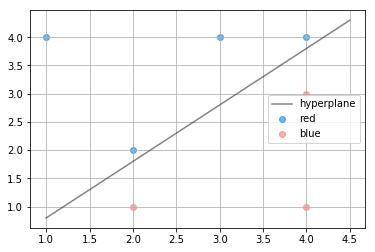

In [40]:
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="#0984e3", label='red', alpha=0.6)
plt.scatter(X[y == 0, 0], X[y == 0, 1], color="#ff7675", label='blue',alpha=0.6)
plt.plot(hyperplane_x, hyperplane_x - 0.2, color="#2d3436", label='hyperplane',alpha=0.6);
plt.grid(True)
plt.legend()

#### (h) Draw an additional observation on the plot so that the two classes are no longer separable by a hyperplane

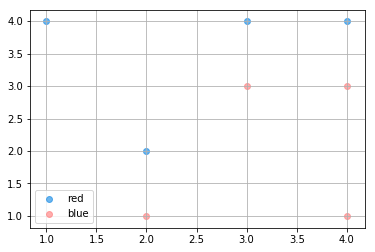

In [41]:
X = np.append(X, [[3,3]], axis = 0)
y = np.append(y, [0], axis= 0)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="#0984e3", label='red', alpha=0.6)
plt.scatter(X[y == 0, 0], X[y == 0, 1], color="#ff7675", label='blue',alpha=0.6)
plt.grid(True)
plt.legend()